In [ ]:
pip install catboost


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

file_path = '/content/001_리딩앤 학습데이터_아이포트폴리오.xlsx'

# 엑셀 파일 불러오기 (시트 이름: "월별 학습 통계")
df = pd.read_excel(file_path, sheet_name="월별 학습 통계")

# 필요한 열 선택
selected_columns = ['1단계 학습 시간(초)', '2단계 학습 시간', '3단계 학습 시간', '4단계 학습 시간', '5단계 학습 시간','월간 학습 일수', '평균 발음 점수(0~1)']
df_selected = df[selected_columns]

# 다음 달 평균 발음 점수를 예측하기 위해 현재 달의 데이터를 다음 달로 이동
df_selected['다음달 평균 발음 점수'] = df_selected['평균 발음 점수(0~1)'].shift(-1)

# 결측치가 있는 행 제거
df_cleaned = df_selected.dropna()

# 사용할 특성과 타겟 선택
features = ['1단계 학습 시간(초)', '2단계 학습 시간', '3단계 학습 시간', '4단계 학습 시간', '5단계 학습 시간','월간 학습 일수']
X = df_cleaned[features]
y = df_cleaned['다음달 평균 발음 점수']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost 모델 생성
xgb_model = XGBRegressor(random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Grid Search를 사용한 하이퍼파라미터 튜닝
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)

# 최적 하이퍼파라미터로 모델 재생성 및 학습
best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train_scaled, y_train)

# 예측
y_pred_xgb = best_xgb_model.predict(X_test_scaled)

# 평가
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Model - Mean Squared Error:", mse_xgb)
print("XGBoost Model - R-squared:", r2_xgb)

FileNotFoundError: ignored

In [ ]:
#### 4그룹 애들만 해서 분석한거 ### 예측 한거 높게 나옴!!! #예측해볼까용 파일


import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

file_path = '/content/군집 최종.xlsx'

# 엑셀 파일 불러오기 (시트 이름: "월별 학습 통계")
df = pd.read_excel(file_path,sheet_name="전체")

# 필요한 열 선택
selected_columns = ['1단계 학습 시간(초)', '2단계 학습 시간', '3단계 학습 시간', '4단계 학습 시간', '5단계 학습 시간','평균 1~5단계 중 1단계 이상 완료 도서 수','평균 월간 학습 일수','평균 학습 단어 수(3단계 완료한 도서의 단어 수 합)','평균 발음점수']
df_selected = df[selected_columns]

# 다음 달 평균 발음 점수를 예측하기 위해 현재 달의 데이터를 다음 달로 이동
df_selected['다음달 평균 발음 점수'] = df_selected['평균 발음점수'].shift(-1)

# 결측치가 있는 행 제거
df_cleaned = df_selected.dropna()

# 사용할 특성과 타겟 선택
features = ['1단계 학습 시간(초)', '2단계 학습 시간', '3단계 학습 시간', '4단계 학습 시간', '5단계 학습 시간','평균 1~5단계 중 1단계 이상 완료 도서 수','평균 월간 학습 일수','평균 학습 단어 수(3단계 완료한 도서의 단어 수 합)','평균 발음점수']
X = df_cleaned[features]
y = df_cleaned['다음달 평균 발음 점수']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost 모델 생성
xgb_model = XGBRegressor(random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Grid Search를 사용한 하이퍼파라미터 튜닝
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)

# 최적 하이퍼파라미터로 모델 재생성 및 학습
best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train_scaled, y_train)

# 예측
y_pred_xgb = best_xgb_model.predict(X_test_scaled)

# 평가
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Model - Mean Squared Error:", mse_xgb)
print("XGBoost Model - R-squared:", r2_xgb)

<ipython-input-4-8d147d78d7d4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['다음달 평균 발음 점수'] = df_selected['평균 발음점수'].shift(-1)


XGBoost Model - Mean Squared Error: 0.012659266157988609
XGBoost Model - R-squared: 0.4381889125808448


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

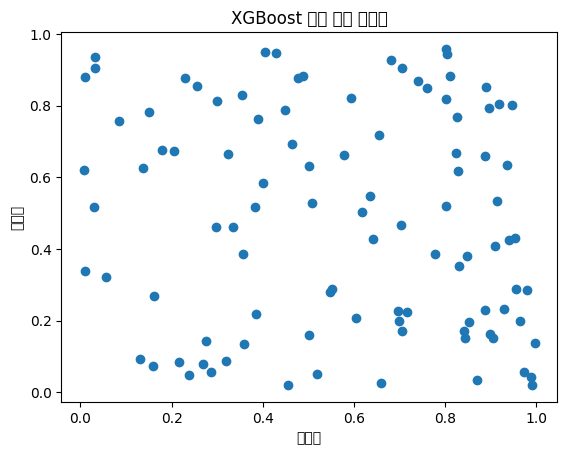

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 예측값과 실제값을 가져옵니다 (이 예에서는 임의로 생성)
y_true = np.random.rand(100)
y_pred = np.random.rand(100)

# Scatter plot을 사용하여 예측값과 실제값을 비교합니다.
plt.scatter(y_true, y_pred)
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('XGBoost 모델 성능 시각화')
plt.show()


In [ ]:
import statsmodels.api as sm
import scipy.stats as stats

residuals = error
fig, ax = plt.subplots(figsize=(6, 3))
sm.qqplot(residuals, stats.t, fit=True, line='45', ax=ax)
plt.title("QQ Plot")
plt.show()
# QQ 플롯은 예측 오차가 정규 분포를 따르는지 확인하는 데 사용됩니다. 정규 분포를 따르는 경우, QQ 플롯은 대각선에 가까운 패턴을 보여야 합니다. 코드 예제는 다음과 같습니다:

In [ ]:
#### 4그룹 애들만 해서 분석한거 ### 예측 한거 높게 나옴!!! #예측해볼까용 파일


import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

file_path = '/content/군집 최종.xlsx'

# 엑셀 파일 불러오기 (시트 이름: "월별 학습 통계")
df = pd.read_excel(file_path,sheet_name="전체")

# 필요한 열 선택
selected_columns = ['1단계 학습 시간(초)', '2단계 학습 시간', '3단계 학습 시간', '4단계 학습 시간', '5단계 학습 시간','평균 1~5단계 중 1단계 이상 완료 도서 수','평균 월간 학습 일수','평균 학습 단어 수(3단계 완료한 도서의 단어 수 합)','평균 발음점수']
df_selected = df[selected_columns]

# 다음 달 평균 발음 점수를 예측하기 위해 현재 달의 데이터를 다음 달로 이동
df_selected['다음달 평균 발음 점수'] = df_selected['평균 발음점수'].shift(-1)

# 결측치가 있는 행 제거
df_cleaned = df_selected.dropna()

# 사용할 특성과 타겟 선택
features = ['1단계 학습 시간(초)', '2단계 학습 시간', '3단계 학습 시간', '4단계 학습 시간', '5단계 학습 시간','평균 1~5단계 중 1단계 이상 완료 도서 수','평균 월간 학습 일수','평균 학습 단어 수(3단계 완료한 도서의 단어 수 합)','평균 발음점수']
X = df_cleaned[features]
y = df_cleaned['다음달 평균 발음 점수']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost 모델 생성
xgb_model = XGBRegressor(random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Grid Search를 사용한 하이퍼파라미터 튜닝
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)

# 최적 하이퍼파라미터로 모델 재생성 및 학습
best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train_scaled, y_train)

# 예측
y_pred_xgb = best_xgb_model.predict(X_test_scaled)

# 평가
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Model - Mean Squared Error:", mse_xgb)
print("XGBoost Model - R-squared:", r2_xgb)

<ipython-input-3-8d147d78d7d4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['다음달 평균 발음 점수'] = df_selected['평균 발음점수'].shift(-1)


XGBoost Model - Mean Squared Error: 0.012659266157988609
XGBoost Model - R-squared: 0.4381889125808448


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-pack

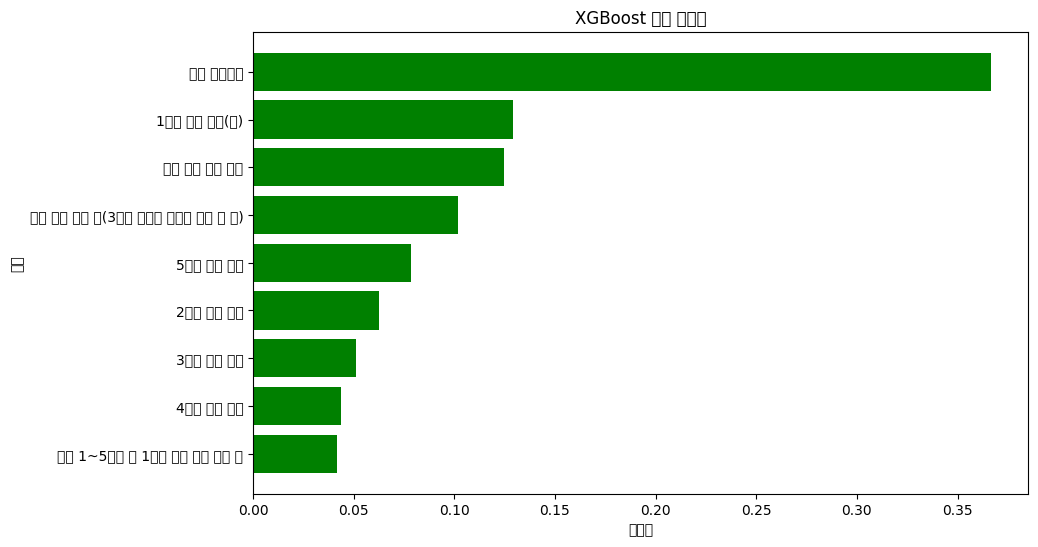

In [ ]:
import matplotlib.pyplot as plt

# XGBoost 모델에서 변수 중요도 확인
feature_importance = best_xgb_model.feature_importances_

# 중요도를 특성 이름과 함께 데이터프레임으로 만들기
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

# 중요도를 Importance 기준으로 내림차순 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 변수 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='green')
plt.xlabel('한글 레이블'.encode('utf-8'))
plt.xlabel('중요도')
plt.ylabel('특성')
plt.title('XGBoost 변수 중요도')
plt.gca().invert_yaxis()  # 중요도가 높은 특성이 위로 오도록 역순으로 표시

plt.show()


In [ ]:
# XGBoost 모델에서 변수 중요도 확인
feature_importance = best_xgb_model.feature_importances_

# 중요도를 특성 이름과 함께 데이터프레임으로 만들기
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

# 중요도를 Importance 기준으로 내림차순 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 변수 중요도 출력
print("변수 중요도:")
print(feature_importance_df)


변수 중요도:
                          Feature  Importance
8                         평균 발음점수    0.366679
0                    1단계 학습 시간(초)    0.129225
6                     평균 월간 학습 일수    0.124621
7  평균 학습 단어 수(3단계 완료한 도서의 단어 수 합)    0.102070
4                       5단계 학습 시간    0.078267
1                       2단계 학습 시간    0.062692
2                       3단계 학습 시간    0.051174
3                       4단계 학습 시간    0.043558
5       평균 1~5단계 중 1단계 이상 완료 도서 수    0.041714
